## Exercise #2: Data Analysis and Visualization

In [1]:
import pandas as pd

# Load the data
exercise_2_df = pd.read_excel('../data/Exercise #2.xlsx')


# Clean and trim column names
exercise_2_df.columns = (exercise_2_df.columns
                         .str.strip()                               # Remove leading and trailing spaces
                         .str.replace(r'\s+', '_', regex=True)      # Replace multiple spaces with a single underscore
                         .str.lower()                               # Convert to lowercase
                         .str.replace(r'[^\w]', '_', regex=True)    # Replace non-alphanumeric characters with underscores
                         .str.replace(r'_{2,}', '_', regex=True)    # Replace multiple consecutive underscores with a single underscore
                         .str.strip('_')                            # Remove leading and trailing underscores
                        )

# Display the first few rows
exercise_2_df.head()

,mirc_subpractice,attorney_on_case,client_birthdate,client_country_of_origin,client_language,client_city,immigration_court_location,event_type,event_date,application_petition_type,application_petition_outcome_date_if_applicable,application_petition_outcome,court_hearing_is_remote_or_in_person,reason_for_application_petition_denial_provided_by_uscis,reason_for_case_representation_ended_if_applicable
0,Released,BB,2008-02-10,Afghanistan,NaN,Grand Rapids,Detroit,Application/petition filed,2022-09-13 00:00:00,I-485,2022-09-21,Denied,NaN,Fee not included,NaN
1,Released,BB,NaT,Afghanistan,NaN,Kalamazoo,Detroit,Application/petition filed,2022-11-12 00:00:00,I-360,2022-11-23,Denied,NaN,Request for evidence not responded to,NaN
2,Released,DD,2008-03-29,Afghanistan,Pashto,Ypsilanti,Detroit,Application/petition filed,2022-12-16 00:00:00,State Court Petition,NaT,Pending,NaN,NaN,Immigration Relief Granted
3,Released,CC,2005-06-12,Afghanistan,NaN,Traverse City,Detroit,Application/petition filed,2022-09-22 00:00:00,State Court Petition,2022-10-01,Granted,NaN,NaN,NaN
4,Released,CC,2004-03-15,Afghanistan,NaN,Traverse City,Detroit,Application/petition filed,2022-12-22 00:00:00,State Court Petition,NaT,Pending,NaN,NaN,NaN


In [2]:
print("Data Columns:", exercise_2_df.columns)

Data Columns: Index(['mirc_subpractice', 'attorney_on_case', 'client_birthdate',
       'client_country_of_origin', 'client_language', 'client_city',
       'immigration_court_location', 'event_type', 'event_date',
       'application_petition_type',
       'application_petition_outcome_date_if_applicable',
       'application_petition_outcome', 'court_hearing_is_remote_or_in_person',
       'reason_for_application_petition_denial_provided_by_uscis',
       'reason_for_case_representation_ended_if_applicable'],
      dtype='object')


In [3]:
# Check the data type of the 'event_date' column
print(exercise_2_df['event_date'].dtype)

# Attempt to convert 'event_date' to datetime, errors='coerce' will set invalid parsing to NaT
exercise_2_df['event_date'] = pd.to_datetime(exercise_2_df['event_date'], errors='coerce')

# Filter the DataFrame to show only rows where 'event_date' is NaT (Not a Time)
invalid_dates = exercise_2_df[exercise_2_df['event_date'].isna()]

# Display the rows with invalid dates
invalid_dates

object


,mirc_subpractice,attorney_on_case,client_birthdate,client_country_of_origin,client_language,client_city,immigration_court_location,event_type,event_date,application_petition_type,application_petition_outcome_date_if_applicable,application_petition_outcome,court_hearing_is_remote_or_in_person,reason_for_application_petition_denial_provided_by_uscis,reason_for_case_representation_ended_if_applicable


In [4]:
exercise_2_df

,mirc_subpractice,attorney_on_case,client_birthdate,client_country_of_origin,client_language,client_city,immigration_court_location,event_type,event_date,application_petition_type,application_petition_outcome_date_if_applicable,application_petition_outcome,court_hearing_is_remote_or_in_person,reason_for_application_petition_denial_provided_by_uscis,reason_for_case_representation_ended_if_applicable
0,Released,BB,2008-02-10,Afghanistan,NaN,Grand Rapids,Detroit,Application/petition filed,2022-09-13,I-485,2022-09-21,Denied,NaN,Fee not included,NaN
1,Released,BB,NaT,Afghanistan,NaN,Kalamazoo,Detroit,Application/petition filed,2022-11-12,I-360,2022-11-23,Denied,NaN,Request for evidence not responded to,NaN
2,Released,DD,2008-03-29,Afghanistan,Pashto,Ypsilanti,Detroit,Application/petition filed,2022-12-16,State Court Petition,NaT,Pending,NaN,NaN,Immigration Relief Granted
3,Released,CC,2005-06-12,Afghanistan,NaN,Traverse City,Detroit,Application/petition filed,2022-09-22,State Court Petition,2022-10-01,Granted,NaN,NaN,NaN
4,Released,CC,2004-03-15,Afghanistan,NaN,Traverse City,Detroit,Application/petition filed,2022-12-22,State Court Petition,NaT,Pending,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Released,II,2008-08-01,Honduras,Spanish,Detroit,Detroit,Representation initiated,2022-09-10,NaN,NaT,NaN,NaN,NaN,NaN
162,Released,CC,2005-06-25,Honduras,Spanish,Lansing,Detroit,Representation initiated,2022-10-26,NaN,NaT,NaN,NaN,NaN,NaN
163,Released,AA,2010-02-14,Mexico,Spanish,Grand Rapids,Detroit,Representation initiated,2022-10-18,NaN,NaT,NaN,NaN,NaN,NaN
164,Released,II,2008-10-10,Mexico,Tzotzil Maya,Grand Rapids,Detroit,Representation initiated,2022-10-26,NaN,NaT,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Number of Cases by Month'}, xlabel='event_date'>

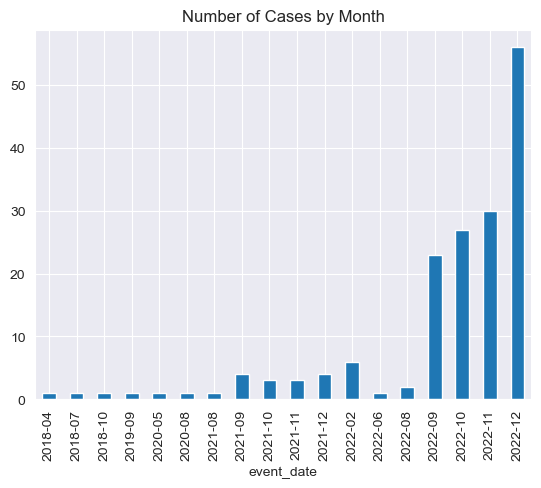

In [5]:
# Analyze trends, e.g., number of cases over time
cases_by_month = exercise_2_df['event_date'].dt.to_period('M').value_counts().sort_index()

# Display the trend
cases_by_month.plot(kind='bar', title='Number of Cases by Month')